### Maing our analysis more realistic

- In the [first notebook](./INFIERI_SCHOOL.ipynb) one might have estimated that Xenon1Ts exposure is around $2\times 10^4\,\rm{kg}\,\rm{days}$, but Xenon1T's fiducial mass is $0.9\,\rm{tons}\times 278.8\, \rm{days}=2.5\times 10^{5}\,\rm{kg}\,\rm{days}$. 
- The main reason that this is so different is because we were oversimplifying our modeling of the experiment. 
- In this notebook, we learn a little bit more about how to model the detector, without actually making a full simulation of the detector! 

In [1]:
from __future__ import print_function

import DM_simple as DM 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

<div style="width:50%; float:left">
<br>

- The Xenon1T detector has a liquid and gas component and has an electric field present. 

- When a recoil happens there are two types of signal. The light signal (S1) and the charge signal (S2).

- Analysis of these signals can help determine the position of the scattering.
    
- Importantly it can give some discrimination between electronic recoils and nuclear recoils.
 
<img src="figures/s1s2_cartoon.png" style="width:70%" >

</div>
<div style="width:50%; float:right">
<br>
    
<img src="figures/detector.png" style="width:80%" >
    
</div>

<div style="width:30%; float:left">
<br>

- Analysing S1 and S2 isn't as clean as the cartton above suggests.
- The figure on the right shows how the signal regions overlap somewhat.
- To avoid misidentifying an electron recoil for a nuclear recoil, Xenon1T perform an analysis cut which reduces the number of nuclear recoils by a factor of $2.105$.
- Determine what Xenon1Ts effective exposure is now? How far is it from your estimate in the [first notebook?](./INFIERI_SCHOOL.ipynb)
 
</div>
<div style="width:70%; float:right">
<br>
    
<img src="figures/real_s1s2.png" style="width:80%" >
    
</div>

#### Whats wrong with electronic recoils?

- There will be something about this by Monday (if not all mention will have vanished).

#### Efficiency curve and a lower $E_{\rm th}$
<div style="width:40%; float:left">
<br>

- Unlike how we models it in the [first notebook](./INFIERI_SCHOOL.ipynb), the detector doesn't measure $E_R$ of the nucleus directly and such having a clear cut for the threshold energy ($E_{\rm th}$) isn't realistic. 

- The plot on the right shows how the region of interest for the experiment is actually $[3-70]$ photo-electrons (PE) in S1.
    
- You see contours of ${\rm keV}_{\rm NR}$ showing how S1 and S2 non-trivially map to $E_{R}$.

 
</div>
<div style="width:60%; float:right">
<br>
    
<img src="figures/xe1t_res.png" style="width:80%" >
    
</div>

- In the end collaborations publish their "efficiency curves" which represent an extra $E_R$ dependent analysis cut. This is shown in the plot below. 

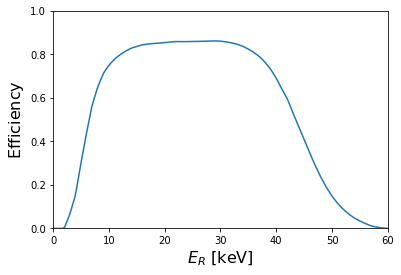

In [2]:
DM.plot_efficiency()

- Lets look again at the differential recoil rates to think about the effects this could have. 

In [3]:
interactive_plot = interact_manual(DM.plot_spec_xe, m_x=DM.mdm_slide, sigma=DM.sigma_slide)

interactive(children=(FloatLogSlider(value=100.0, description='$m_{\\rm DM}\\,\\, (\\rm{GeV})$', max=3.0, step…

- For a large part of the signal, the efficiency simply adds an additional factor of $0.8$ to the exposure. How far is this from your estimate in [the first notebook?](./INFIERI_SCHOOL.ipynb)

- There is also the additional fact that now, $E_{\rm th}$ may be a little lower than you had estimated.

- By looking at the signal shape, you can see that this provides additional recoils. 

- Below I call the efficiency function, find the new $E_{\rm th}$.

In [4]:
effiency = DM.read_efficiency()

In [5]:
effiency(4.0)

array(0.152786)

- Below the interactive window compares the signal without and with the detector efficiency.

In [6]:
interactive_plot = interact_manual(DM.plot_xe1t_bin_eff,
                                    m_x=DM.mdm_slide, 
                                    sigma=DM.sigma_slide)

interactive(children=(FloatLogSlider(value=100.0, description='$m_{\\rm DM}\\,\\, (\\rm{GeV})$', max=3.0, step…

- maybe something to do with backgrounds

In [7]:
0.9*1e3*278.8*0.45*0.8 

90331.20000000001

#### Returning to the exclusion calculation

- As discussed above, Xenon1T did actually expect $1.62$ background events and after all analysis cuts were applied they observed $(N_{\rm obs})$ 2 events. 

- This changes the calculation for the 90% confidence limit. 

- Show that it leads to the equation

$$1+N_{\rm th} + N_{\rm th}^2= 0.1 e^{N_{\rm th}}$$

- Remembering that $N_{\rm th}= N_{\rm DM}+ N_{\rm bk}$, find the solution for $N_{\rm th}$ in the equation above to show that now $N_{\rm DM}=3.68$ corresponds to the 90% confidence level. 

- Below we have a new function which calculates the counts in a xenon experiment using the xenon efficiency. You can use this to calculate your new 90% C.L. as in [the first notebook.](./INFIERI_SCHOOL.ipynb)

In [10]:
xenon1t_eth = 2.0 ## Type a low value where efficiency = 0.0 from above.
xenon1t_expo = 0.9*1e3*278.8*0.475 ## 0.9 t * 278.8 days * analysis cut 

In [11]:
DM.Nevents_xenon_eff(Eth = xenon1t_eth, exposure=xenon1t_expo, m_x = 100.0, sigma=1e-46)

4.3038930999041805

- Now you can explore the effects of [annual modulation.](Annual_modulation.ipynb)